In [ ]:
def coeff(x,y):
  s1,s2=0,0
  xbar=x.mean()
  ybar=y.mean()
  for i in range (len(x)):
    s1+=(x[i]-xbar)*(y[i]-ybar)
    s2+=(x[i]-xbar)**2

  a=s1/s2
  b=ybar-a*xbar
  return a,b

In [ ]:
def coeff1(x,y):
  xbar=x.mean()
  ybar=y.mean()
  a=((x-xbar)*(y-ybar)).sum()/((x-xbar)**2).sum()
  b=ybar-xbar*a
  return a,b

In [ ]:
import pandas as pd

df=pd.read_csv("Iris.csv")

In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
x=df['PetalLengthCm']
y=df['PetalWidthCm']
coeff(x,y)
coeff1(x,y)

(0.416419132285401, -0.36651404521672704)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def afficher_valeurs_obs(x,y):
  plt.scatter(x,y,label="valeurs observées")
  plt.xlabel("X")
  plt.ylabel("y")

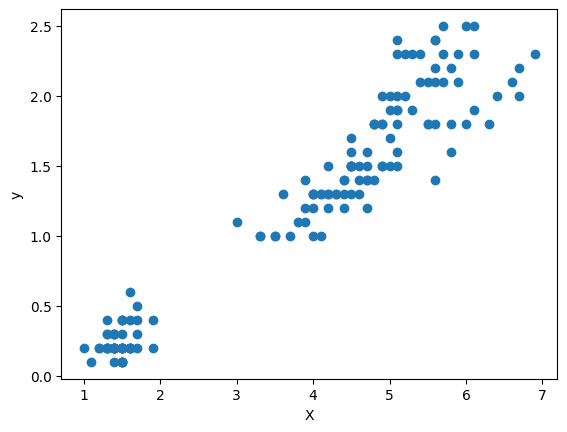

In [ ]:
x=df['PetalLengthCm']
y=df['PetalWidthCm']
afficher_valeurs_obs(x,y)

In [ ]:
def predict(xnew,a,b):
  return a*xnew+b

In [ ]:
x=df['PetalLengthCm']
y_pred=predict(x,coeff(x,y)[0],coeff(x,y)[1])

In [ ]:
def afficher_valeurs_predites_model(x,y_pred):
  plt.scatter(x,y_pred,label="valeurs prédites")
  plt.plot(x,y_pred,label="modele")

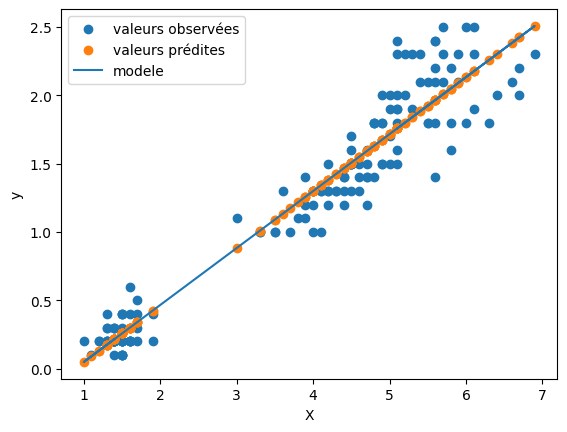

In [ ]:
x=df['PetalLengthCm']
y=df['PetalWidthCm']
afficher_valeurs_obs(x,y)
afficher_valeurs_predites_model(x,y_pred)
plt.legend()


In [ ]:
def mse(a,b,x,y):
  s=(((a*x+b)-y)**2).sum()
  return s/len(y)

In [ ]:
mse(coeff(x,y)[0],coeff(x,y)[1],x,y)

0.04228994631948424

In [ ]:
import numpy as np

MSE=np.mean((y-y_pred)**2)
MSE1=np.sum((y-y_pred)**2)/len(y)
R=1-np.sum((y-y_pred)**2)/sum((y-y.mean())**2)

In [ ]:
R

0.9269012279220037

In [ ]:
x=df['PetalLengthCm']
y=df['PetalWidthCm']
x=np.array(x)
x=np.reshape(x,(len(x),1))


In [ ]:
x=np.append(x,np.ones((len(x),1)),axis=1)

In [ ]:
import numpy.linalg as lng

In [ ]:
theta=lng.inv(x.T.dot(x)).dot(x.T).dot(y)

In [ ]:
theta

array([ 0.41641913, -0.36651405])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
x=df['PetalLengthCm']
y=df['PetalWidthCm']
x=np.array(x)
x=np.reshape(x,(len(x),1))
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)

In [ ]:
model.coef_

array([0.41641913])

In [ ]:
model.intercept_

-0.3665140452167275

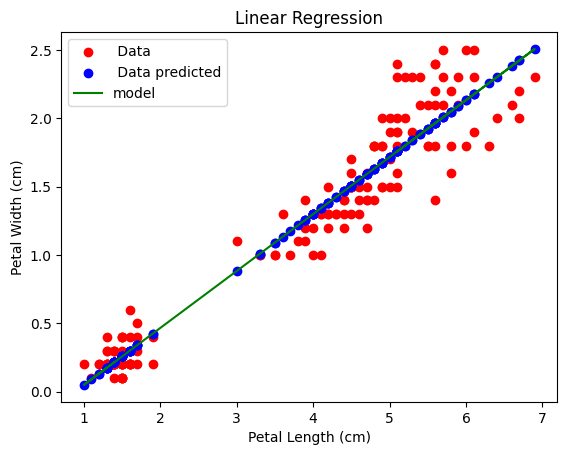

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(x, y, color='red', label=' Data')
plt.scatter(x, y_pred, color='blue', label=' Data predicted')

plt.plot(x, y_pred, color='green', label='model')

plt.title('Linear Regression')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y, y_pred)# aussi model.score(x,y)
print("R-squared Score:", r2)

Mean Squared Error: 0.04228994631948424
R-squared Score: 0.9269012279220037


##Exercice2


In [ ]:
x=6*np.random.rand(100,1)-3
y=0.5*x**2+x+2+np.random.randn(100,1)

# **Tp 4**

In [1]:
import numpy as np

In [2]:
x=2*np.random.randn(100,1)
y=4+3*x+np.random.randn(100,1)

In [3]:
def h (x,theta):
  return np.dot(x,theta)

In [7]:
def gradient1(x,y,theta):
  #g=np.zeros((2,1))
  #g[0,0]= valeur loula
  #g[1,0]=valeur theniya
  s1,s2=0,0
  m=len(x)
  for i in range(m):
    s1+=x[i,0]*(theta[0,0]*x[i,0]+theta[1,0]-y[i,0])
    s2+=theta[0,0]*x[i,0]+theta[1,0]-y[i,0]
  return np.array([[(2*s1)/m],[(2*s2)/m]])


In [5]:
def gradient2(x,y,theta):
  m=len(x)
  return(2/m)*x.T.dot(h(x,theta)-y)

In [8]:
import numpy as np
x=2*np.random.randn(100,1)
y=4+3*x+np.random.randn(100,1)
x_b=np.append(x,np.ones((len(x),1)),axis=1)
theta=np.random.randn(2,1)
g1=gradient1(x,y,theta)
g2=gradient2(x_b,y,theta)
print(g1)
print(g2)

[[-32.0632403 ]
 [ -8.04255335]]
[[-32.0632403 ]
 [ -8.04255335]]


In [20]:
def descente_gradient1(x,y,lrate,n):
  #initialisation aleatoire de theta
  theta=np.random.randn(2,1)
  for i in range(n):
    #calcul de gradient
    g=gradient1(x,y,theta)
    #mise a jour des params
    theta[0,0]=theta[0,0]-lrate*g[0,0]
    theta[1,0]=theta[1,0]-lrate*g[1,0]
  return theta

In [21]:
theta= descente_gradient1(x,y,0.01,10000)

In [22]:
theta

array([[2.96868606],
       [4.11257956]])

In [35]:
def descente_gradient2(x,y,lrate,n):
    theta=np.random.randn(2,1)
    for i in range (n):
      theta=theta-lrate*gradient1(x,y,theta)

    return theta

In [33]:
theta= descente_gradient2(x,y,0.01,10000)
theta

array([[2.96868606],
       [4.11257956]])

In [34]:
from sklearn.linear_model import SGDRegressor


In [37]:
model = SGDRegressor(max_iter = 10000,learning_rate='constant')
model.fit(x,y)
a=model.coef_
b=model.intercept_


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
print(a,b)

[2.98255307] [4.11935721]


# **Partie2**

In [54]:
def cout(x,y,theta):
  s=0
  for i in range(len(x)):
    s+=((theta[0,0]*x[i,0]+theta[1,0]-y[i,0])**2)
  return (s/len(x))

In [42]:
#def cout(x,y,theta):
 # return np.mean((h(x,theta)-y)**2)

In [55]:
def descente_gradient3(x,y,lrate,n):
    theta=np.random.randn(2,1)
    cost_history=np.zeros(n)
    for i in range (n):
      theta=theta-lrate*gradient1(x,y,theta)
      cost_history[i]=cout(x,y,theta)
    return theta,cost_history

In [45]:
import matplotlib.pyplot as plt


In [60]:
theta,cost_history= descente_gradient3(x,y,0.01,100)


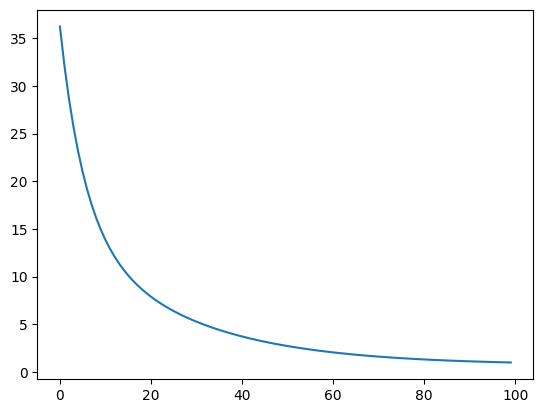

In [61]:
l=[i for i in range(len(cost_history))]
plt.plot(l,cost_history)